<h1>Lecturas<h1>





Primera pregunta de lectura
Los factores que determinan el papel del ingenio (naturaleza) en la relación con el entorno (educación), utilizando probabilidades según características de nacimiento, raza y parte socioeconómica de nacimiento de la familia. Surge la siguiente pregunta Qué factores o características nos permiten identificar a las personas que son susceptibles de desarrollar una alta creatividad.Una pequeña omisión es que las opiniones expresadas en este artículo son las de los autores únicamente y no reflejan necesariamente las opiniones de USA. o los Institutos Nacionales de Salud, que serán de gran ayuda con la investigación. Además, tener más información sobre la ubicación de las escuelas revelará factores adicionales porque las oportunidades en áreas más densamente pobladas no son las mismas para todos. Además, podrán agregar alimentos, acceder a internet, lo que desarrollará sus habilidades de búsqueda; y el acceso a la tecnología, ya que permite que florezca la creatividad. También puede ser muy útil poder usar los datos y compararlos con datos de otros países si se necesita un estudio más amplio.

segunda pregunta de lectura
Una deficiencia señalada es que su estudio podría refinarse centrándose en los patrones generales de desarrollo institucional y cómo los eventos actuales están afectando las áreas clave que deben explorarse. Bueno, el hecho de que todo haya sido utilizado para combatir o resolver un problema no significa que todavía sea útil hoy en día cuando el contexto es diferente, simplemente significa que hay otros factores que influyen en la estructura del cuerpo. Si bien este documento ayuda a aprender un poco más sobre la población hispana en general y su impacto en ella, aún existe la necesidad de explorar la evolución de la población y el impacto de las políticas mineras durante muchos siglos. De igual forma, es recomendable realizar y profundizar investigaciones tanto en Perú como en Bolivia, pues recordemos que estos dos países están íntimamente ligados a un mito que impregna la mayor parte de sus territorios.



<h1>Pregunta1<h1>

* **Indetifique todos los elementos necesarios para implementar un enfoque de IV en este ejemplo.**

* 	Exogeneidad: en este caso, el instrumento Z no tendría que relacionarse con el error del modelo regresionado para que el estimador no salga sesgado.
* 	Relevancia: la covarianza entre X y Z diferente de 0. Es decir que tiene que haber un resultado alto o relevante en la covarianza del instrumento y la variable explicativa

* **Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones**

	Si regresionamos el modelo usando la variable instrumental, podremos obtener el estadístico F de esta regresión. Y si este resultado es mayor que 10 se cumple la regla de oro y por lo tanto el instrumento utilizado tiene una relación causal.

* **¿El efecto de la educación sobre el nivel de ingresos es positivo o negativo? Argumente si los resultados serian causales o solamente de correlación**

 	Se puede suponer que la educación tiene un efecto positivo sobre el nivel de ingresos, pues con la data disponible se puede observar que mientras hay un mayor salario también hay un mayor nivel de educación. Por lo tanto, los resultado causales y de correlación tendrían que cumplirse. 

<h1>Pregunta2<h1>

* **Indetifique todos los elementos necesarios para implementar un RDD en este ejemplo.**

	El primero elemento es el Running Variable, este determina si un grupo es o no de control o de tratamiento. Luego con el elemento Cut off, el cual es una observación del Running Variable, este elemento determinará también, a través de la observación, si se trata de un grupo de control o de tratamiento. Finalmente, Bond Width es un elemento que determinará qué tan lejos o cerca se está de la discontinuidad. Es decir, un intervalo.

* **Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.**

	Para encontrar el efecto causal en este escenario se tendría que encontrar el promedio de las notas de los estudiantes sin becas y compararlo con el promedio de las notas de los estudiantes con becas. Partiendo del cut off el cual es la aplicación de las becas en los alumnos con promedio superior durante la secundaria igual a 16.

* **¿El efecto de la politica sobre el rendimiento de los estudiantes sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación .**

	Debido a que la muestra escogida para dar la beca tiene un sesgo, el cual se debe a la falta de aleatoriedad. El efecto de la política aplicada sobre el rendimiento de los estudiantes en el primer semestre de la universidad sería positivo. En este sentido, no habría una relación de causalidad, debido al sesgo; sin embargo, si habrá una correlación alta. 

<h1>Pregunta3<h1>

* **Indetifique todos los elementos necesarios para implementar un DiD en este ejemplo.**

	El primer elemento es la identificación de los grupos (tratamiento y control), segundo se identifica el año, día, mes, etc. donde se aplica la política, tercero se debe cumplir que haya un efecto en el grupo de tratamiento y que no haya efecto en el grupo de control. Y cuarto se debe cumplir que ambos grupos deben tener las mismas pendientes antes de la aplicación de la política.

* **Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.**

 	Para encontrar el efecto causal se debe seguir la siguiente ecuación:

##TE=[(Z_(después política)^tratamiento-Z_(antes política)^tratamiento )-(Z_(después política)^control-Z_(antes política)^control )

* **¿El efecto de la migración sobre la tasa de empleo sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación .**

	Es esperable que una alta migración genere una caída en la tasa de empleo, pues aumentaría la demanda. En este sentido, los resultados serían causales y de correlación debido a la aleatoriedad de la situación, la cual tiene características de un experimento natural. 

In [1]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
# pip install causalgraphicalmodels
# pip install linearmodels

from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns


In [7]:
# load data

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


<h1> Ploteo de Histograma<h1>

In [8]:
#Analizamos la comparacion entre educacion y nearc2
card_educ = card[['educ','nearc2']]
card_educ

,educ,nearc2
0,7.0,0.0
1,12.0,0.0
2,12.0,0.0
3,11.0,1.0
4,12.0,1.0
...,...,...
3005,12.0,0.0
3006,13.0,0.0
3007,12.0,0.0
3008,12.0,0.0


In [40]:
#estructura de agrupacion variables nearc2_char para los school y N_school
card_educ2 = (card_educ
 .assign(caracterNearc2 = np.select(
     [card_educ["nearc2"].astype(bool), card_educ["educ"].astype(bool)],
     ["school", "N_school"]
 ))) 
card_educ2

,educ,nearc2,caracterNearc2
0,7.0,0.0,N_school
1,12.0,0.0,N_school
2,12.0,0.0,N_school
3,11.0,1.0,school
4,12.0,1.0,school
...,...,...,...
3005,12.0,0.0,N_school
3006,13.0,0.0,N_school
3007,12.0,0.0,N_school
3008,12.0,0.0,N_school


In [41]:
card_educ3 = card_educ2[['educ','caracterNearc2']]
card_educ3

,educ,caracterNearc2
0,7.0,N_school
1,12.0,N_school
2,12.0,N_school
3,11.0,school
4,12.0,school
...,...,...
3005,12.0,N_school
3006,13.0,N_school
3007,12.0,N_school
3008,12.0,N_school


<h1>Grafique dos histogramas para la variable años de educación educ para cuando nearc2 == 1, y cuando nearc2 == 0. Compare y describa los patrones que encuentra.<h1>

* **cuando nearc2==0**

In [42]:
Groups = ["N_school"]
COMP = card_educ3[card_educ3['caracterNearc2'].isin(Groups)]
COMP

,educ,caracterNearc2
0,7.0,N_school
1,12.0,N_school
2,12.0,N_school
23,12.0,N_school
24,12.0,N_school
...,...,...
3005,12.0,N_school
3006,13.0,N_school
3007,12.0,N_school
3008,12.0,N_school


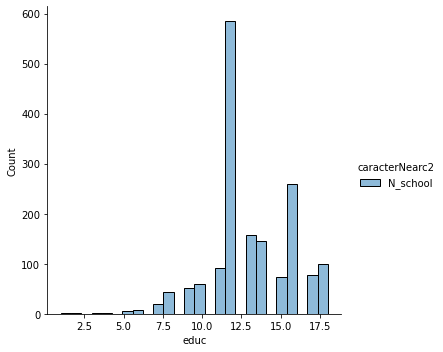

In [43]:
sns.displot(COMP, x="educ", hue= "caracterNearc2")

* **cuando nearc2==1**

In [44]:
Groups = ["school"]
COMP2 = card_educ3[card_educ3['caracterNearc2'].isin(Groups)]
COMP2

,educ,caracterNearc2
3,11.0,school
4,12.0,school
5,12.0,school
6,18.0,school
7,14.0,school
...,...,...
2899,10.0,school
2900,4.0,school
2901,8.0,school
2902,10.0,school


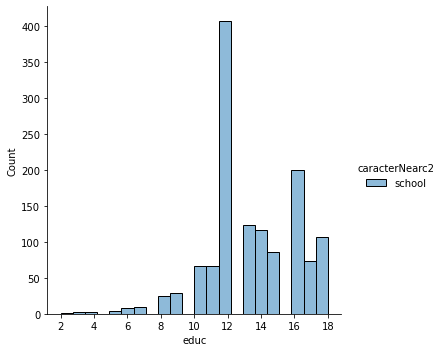

In [45]:
sns.displot(COMP2, x="educ", hue= "caracterNearc2")

**Conclusion**

* En los histogramas se puede ver que cuando nearc2 es igual 1, la cantidad de personas que llegan a más años de educación aumenta a más del doble a partir de los 12 años de educación. Sin embargo, antes de los 10 años de eduación, la variable nearc2 no es tan fuerte respecto a los años de educación de las personas. Asimismo, se puede apreciar que la mayoría de las personas llegan a los 12 años de educación, independientemente de si la Dummy nearc2 es igual a 0 o igual a 1.

<h1> logaritmos de los ingresos<h1>

In [15]:
#Analizamos la comparacion entre lwage y nearc2
card_lwage = card[['lwage','nearc2']]
card_lwage

,lwage,nearc2
0,6.306275,0.0
1,6.175867,0.0
2,6.580639,0.0
3,5.521461,1.0
4,6.591674,1.0
...,...,...
3005,5.814130,0.0
3006,6.175867,0.0
3007,6.214608,0.0
3008,6.569481,0.0


In [46]:
#estructura de agrupacion variables nearc2_char para los school y N_school"

card_lwage2 = (card_lwage
 .assign(caracterNearc2 = np.select(
     [card_lwage["nearc2"].astype(bool), card_lwage["lwage"].astype(bool)],
     ["school", "N_school"]
 ))) 
card_lwage2

,lwage,nearc2,caracterNearc2
0,6.306275,0.0,N_school
1,6.175867,0.0,N_school
2,6.580639,0.0,N_school
3,5.521461,1.0,school
4,6.591674,1.0,school
...,...,...,...
3005,5.814130,0.0,N_school
3006,6.175867,0.0,N_school
3007,6.214608,0.0,N_school
3008,6.569481,0.0,N_school


In [47]:
#agrupacion entre nearc2_char y lwage
card_lwage3 = card_lwage2[['lwage','caracterNearc2']]
card_lwage3

,lwage,caracterNearc2
0,6.306275,N_school
1,6.175867,N_school
2,6.580639,N_school
3,5.521461,school
4,6.591674,school
...,...,...
3005,5.814130,N_school
3006,6.175867,N_school
3007,6.214608,N_school
3008,6.569481,N_school


<h1> Grafique dos histogramas para la variable logaritmos de los ingresos lwage para cuando nearc2 == 1, y cuando nearc2 == 0. Compare y describa los patrones que encuentra.<h1>

**cuando nearc2==0**

In [48]:
Groups = ["N_school"]
COMP3 = card_lwage3[card_lwage3['caracterNearc2'].isin(Groups)]
COMP3

,lwage,caracterNearc2
0,6.306275,N_school
1,6.175867,N_school
2,6.580639,N_school
23,6.403574,N_school
24,6.541030,N_school
...,...,...
3005,5.814130,N_school
3006,6.175867,N_school
3007,6.214608,N_school
3008,6.569481,N_school


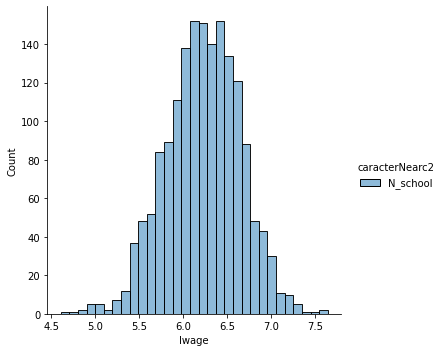

In [49]:
sns.displot(COMP3, x="lwage", hue= "caracterNearc2")

**cuando nearc2==1**

In [50]:
Groups = ["school"]
COMP4 = card_lwage3[card_lwage3['caracterNearc2'].isin(Groups)]
COMP4

,lwage,caracterNearc2
3,5.521461,school
4,6.591674,school
5,6.214608,school
6,6.336826,school
7,6.410175,school
...,...,...
2899,5.669881,school
2900,5.521461,school
2901,6.725034,school
2902,6.075346,school


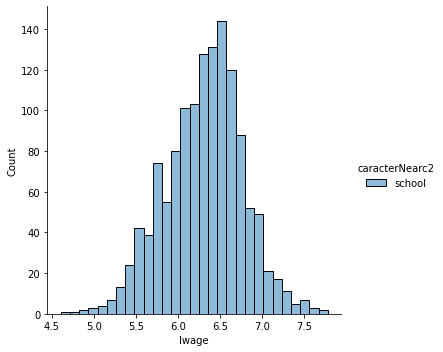

In [51]:
sns.displot(COMP4, x="lwage", hue= "caracterNearc2")

**Conclusion**

* En los histogramas se puede ver que cuando nearc2 es igual a 1, la cantidad de personas que tienen un salario alto es más del doble, respecto a cuando nearc2 es igual a 0. Además, mientras el salario aumenta cada vez más, la cantidad de personas cuando nearc2 es igual a 0 es casi 0. Asimismo, se puede ver una distribución más pareja a las personas con nearc2 igual a 0; por otro lado, cuando nearc2 es igual a 1, la distribución de la cantidad de personas es más dispareja, hay una mayor concentración en la mitad de la tabla, cuando el logaritmo del salario es igual a 6.5

<h1> Regresiones <h1>

* **Corran una regresion lineal del tipo "lwage ~ educ + exper + black + south + married + smsa", y expliquen los resultados que encuentran.**

In [37]:
#OLS
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     219.1
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          1.69e-232
Time:                        16:35:23   Log-Likelihood:                -1278.7
No. Observations:                3010   AIC:                             2571.
Df Residuals:                    3003   BIC:                             2613.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0642      0.064     79.594      0.000       4.939       5.189
educ           0.0711      0.003     20.439      0.000       0.064       0.078
exper          0.0342      0.002     15.459      0.000       0.030       0.039
black         -0.1654      0.018     -9.408      0.000      -0.200      -0.131
south         -0.1325      0.015     -8.855      0.000      -0.162      -0.103
married       -0.0358      0.003    -10.542      0.000      -0.042      -0.029
smsa           0.1751      0.015     11.338      0.000       0.145       0.205
==============================================================================
Omnibus:                       52.534   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.142
Skew:                          -0.231   Prob(JB):                     1.60e-15
Kurtosis:                       3.575   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**

* La variable endógena “logaritmo del salario” es regresionada con las variables educ, exp, black, sur, married, smsa. Esta regresión muestra que el intercepto de la variable “logaritmo del salario” es 5.06 unidades logarítmicas. Asimismo, las variables educ, exper y smsa tienen coeficiente positivo, por lo que mientras mayor sean estas variables o la Dummy sea 1, el intercepto aumentará. Mientras que para las demás variables, su coeficiente es negativo.

* **Corran una regresion de tipo IV(usando el paquete IV2SLS) donde van a instrumentalizar la variable educ con nearc2. Compare los resultados encontrados usando IV2SLS con la primera regresión. ¿Cambió el coeficiente relacionado a educ , por qué?**

In [38]:
# There are null values in the dataset, we will fill them with 0
card['married'] = card['married'].fillna(0)

In [39]:
#2SLS
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2]", card).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Fri, Dec 09 2022   P-value (F-stat)                0.0000
Time:                        16:35:28   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

**Conclusion**

* La primera regresión respecto a la segunda, donde se ha colocado a nearc4 como instrumento en lugar de nearc2, se puede apreciar que ha disminuido 4 veces aproximadamente el intercepto. Asimismo, algunos coeficientes de las variables exógenas cambian de positivo a negativo o viceversa, como “black”.

* El coeficiente de la variable educ se triplicó aproximadamente, pasando de 0.1279 a 0.3618. lo que quiere decir que la variable educ se hace más relevante en la segunda regresión. Es decir que por un año más de educación, el aumento del salario será mayor, en comparación con la primera regresión.

* El P-value no es significativo, pues es mayor que 0.05.